# Introduction to Convolutional Neural Networks

CSC/DSC 340 Week 10 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 21, 2023

Last Modified: October 21, 2023

## Introduction and Termoinology

* This week we will cover convolutional neural networks (CNNs)
    * Image analysis, video analysis, object detection
* Note that we will not be going through any mathematics this week as the mathematics of CNNs is quite complicated but there are many good resources (including your textbook) if you are interested

* Convolution refers to the mathematical combination of two functions to produce a third function
    * It merges two sets of information
    * The convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

![CNNs](https://cdn-media-1.freecodecamp.org/images/Htskzls1pGp98-X2mHmVy9tCj0cYXkiCrQ4t)

[Image Source](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

## Introduction to the MNIST Data Set
* Photos (28 pixels by 28 pixels) of handwritten numeric digits as the input
* Number shown in the photo as an output
* Challenges: 2D data structure (images), variations in handwriting, low quality images, size of data set (60,000 images in the training set, 10,000 in the test set)

### Import With Tensorflow
* Also avaliable through Scikit-Learn, but does not come automatically split into a training and test set

In [1]:
import tensorflow as tf

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


* Let's display some of the images

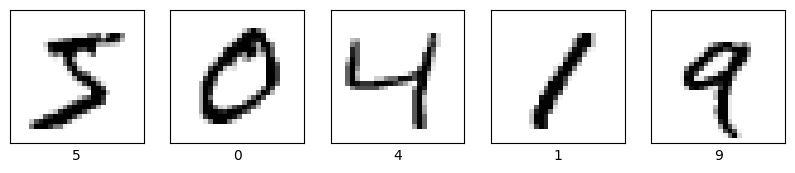

In [2]:
import matplotlib.pyplot as plt
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

* 60k is a lot of images to have in a training set (though may be needed for large neural networks)
* Let's randomly select 5k images to use for training instead of 60k so networks train faster
* Can use a smaller data set in the construction of your neural network (hyperparameter tuning process) but then use a larger sample to train the final network

In [3]:
import numpy as np
random_indices = np.random.choice(60000, 5000, replace=False)
train_images_smaller = train_images[random_indices]
train_labels_smaller = train_labels[random_indices]

* Classification can suffer from class imbalances. Let's make sure our data is relatively evenly distributed.

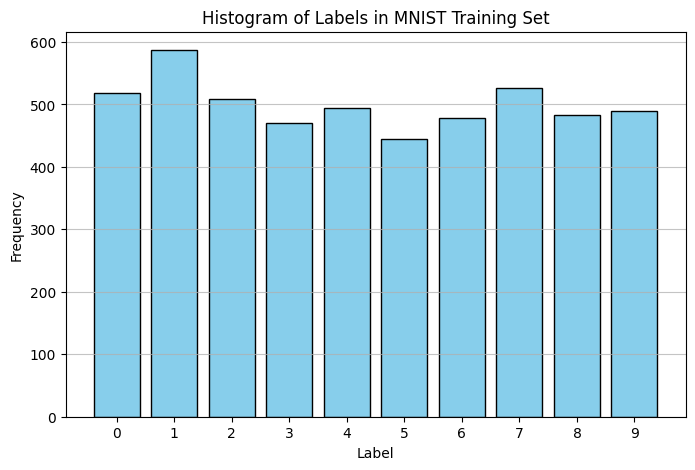

In [4]:
# Create a histogram of the labels
plt.figure(figsize=(8, 5))
plt.hist(train_labels_smaller, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Classification with a Regular Neural Network
* We can clasify the MNIST data with a regular neural network, but due to its architecture we have to flatten the data before it can reach the dense layers
* Neural networks can be used to successfully classify images, but flattening the images can remove important patterns

* Create a model that flattens the data (28x28 pixel images). We then have one hidden layer with 128 neurons and a Relu activation function, and an output layer with 10 neurons (10 possible outputs) and a softmax activation function since this is a classification.

In [5]:
from tensorflow.keras import layers, models
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* For compiling the model we will use the Adam optimizer, our metric of success will be accuracy, and our loss function is sparse categorical cross-entropy
    * Sparse categorical cross-entropy is similiar to categorical cross-entropy but while categorical cross-entropy requires the data to be one-hot encoded prior to training the model, sparse categorical cross-entropy does not

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Train the model and the determine the accuracy

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


   1/1875 [..............................] - ETA: 3:30 - loss: 2.4217 - accuracy: 0.1250

  77/1875 [>.............................] - ETA: 1s - loss: 0.9883 - accuracy: 0.7374  

 158/1875 [=>............................] - ETA: 1s - loss: 0.7044 - accuracy: 0.8091

 235/1875 [==>...........................] - ETA: 1s - loss: 0.5944 - accuracy: 0.8383

 315/1875 [====>.........................] - ETA: 1s - loss: 0.5224 - accuracy: 0.8562

 396/1875 [=====>........................] - ETA: 0s - loss: 0.4750 - accuracy: 0.8689

 475/1875 [======>.......................] - ETA: 0s - loss: 0.4446 - accuracy: 0.8761

 554/1875 [=======>......................] - ETA: 0s - loss: 0.4201 - accuracy: 0.8837

 635/1875 [=========>....................] - ETA: 0s - loss: 0.4000 - accuracy: 0.8889

 716/1875 [==========>...................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8928

 793/1875 [===========>..................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8972

 874/1875 [============>.................] - ETA: 0s - loss: 0.3518 - accuracy: 0.9014

 954/1875 [==============>...............] - ETA: 0s - loss: 0.3400 - accuracy: 0.9046

1033/1875 [===============>..............] - ETA: 0s - loss: 0.3293 - accuracy: 0.9074

1111/1875 [================>.............] - ETA: 0s - loss: 0.3198 - accuracy: 0.9099

1194/1875 [==================>...........] - ETA: 0s - loss: 0.3094 - accuracy: 0.9128

1277/1875 [===================>..........] - ETA: 0s - loss: 0.3003 - accuracy: 0.9151

1354/1875 [====================>.........] - ETA: 0s - loss: 0.2941 - accuracy: 0.9168

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2863 - accuracy: 0.9189

1517/1875 [=======================>......] - ETA: 0s - loss: 0.2799 - accuracy: 0.9206

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2748 - accuracy: 0.9219

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2694 - accuracy: 0.9233

1761/1875 [===========================>..] - ETA: 0s - loss: 0.2642 - accuracy: 0.9249

1841/1875 [============================>.] - ETA: 0s - loss: 0.2594 - accuracy: 0.9261

1875/1875 [==============================] - 1s 737us/step - loss: 0.2575 - accuracy: 0.9266 - val_loss: 0.1362 - val_accuracy: 0.9590


Epoch 2/5


   1/1875 [..............................] - ETA: 2s - loss: 0.1399 - accuracy: 0.9688

  80/1875 [>.............................] - ETA: 1s - loss: 0.1309 - accuracy: 0.9609

 158/1875 [=>............................] - ETA: 1s - loss: 0.1260 - accuracy: 0.9628

 235/1875 [==>...........................] - ETA: 1s - loss: 0.1222 - accuracy: 0.9644

 315/1875 [====>.........................] - ETA: 1s - loss: 0.1232 - accuracy: 0.9646

 396/1875 [=====>........................] - ETA: 0s - loss: 0.1211 - accuracy: 0.9651

 474/1875 [======>.......................] - ETA: 0s - loss: 0.1223 - accuracy: 0.9650

 555/1875 [=======>......................] - ETA: 0s - loss: 0.1206 - accuracy: 0.9653

 637/1875 [=========>....................] - ETA: 0s - loss: 0.1215 - accuracy: 0.9645

 718/1875 [==========>...................] - ETA: 0s - loss: 0.1217 - accuracy: 0.9644

 798/1875 [===========>..................] - ETA: 0s - loss: 0.1219 - accuracy: 0.9641

 880/1875 [=============>................] - ETA: 0s - loss: 0.1223 - accuracy: 0.9640

 962/1875 [==============>...............] - ETA: 0s - loss: 0.1193 - accuracy: 0.9647

1041/1875 [===============>..............] - ETA: 0s - loss: 0.1190 - accuracy: 0.9650

1124/1875 [================>.............] - ETA: 0s - loss: 0.1191 - accuracy: 0.9652

1208/1875 [==================>...........] - ETA: 0s - loss: 0.1178 - accuracy: 0.9652

1272/1875 [===================>..........] - ETA: 0s - loss: 0.1168 - accuracy: 0.9654

1349/1875 [====================>.........] - ETA: 0s - loss: 0.1153 - accuracy: 0.9660

1431/1875 [=====================>........] - ETA: 0s - loss: 0.1145 - accuracy: 0.9661

1510/1875 [=======================>......] - ETA: 0s - loss: 0.1140 - accuracy: 0.9664

1590/1875 [========================>.....] - ETA: 0s - loss: 0.1143 - accuracy: 0.9662

1673/1875 [=========================>....] - ETA: 0s - loss: 0.1136 - accuracy: 0.9663

1756/1875 [===========================>..] - ETA: 0s - loss: 0.1131 - accuracy: 0.9665

1834/1875 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9664

1875/1875 [==============================] - 1s 698us/step - loss: 0.1126 - accuracy: 0.9665 - val_loss: 0.0996 - val_accuracy: 0.9695


Epoch 3/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0621 - accuracy: 1.0000

  82/1875 [>.............................] - ETA: 1s - loss: 0.0809 - accuracy: 0.9718

 165/1875 [=>............................] - ETA: 1s - loss: 0.0791 - accuracy: 0.9746

 247/1875 [==>...........................] - ETA: 0s - loss: 0.0791 - accuracy: 0.9746

 323/1875 [====>.........................] - ETA: 0s - loss: 0.0774 - accuracy: 0.9756

 404/1875 [=====>........................] - ETA: 0s - loss: 0.0762 - accuracy: 0.9766

 486/1875 [======>.......................] - ETA: 0s - loss: 0.0780 - accuracy: 0.9759

 565/1875 [========>.....................] - ETA: 0s - loss: 0.0803 - accuracy: 0.9758

 646/1875 [=========>....................] - ETA: 0s - loss: 0.0784 - accuracy: 0.9763

 729/1875 [==========>...................] - ETA: 0s - loss: 0.0790 - accuracy: 0.9763

 809/1875 [===========>..................] - ETA: 0s - loss: 0.0775 - accuracy: 0.9765

 889/1875 [=============>................] - ETA: 0s - loss: 0.0774 - accuracy: 0.9766

 970/1875 [==============>...............] - ETA: 0s - loss: 0.0778 - accuracy: 0.9764

1053/1875 [===============>..............] - ETA: 0s - loss: 0.0773 - accuracy: 0.9765

1130/1875 [=================>............] - ETA: 0s - loss: 0.0786 - accuracy: 0.9760

1210/1875 [==================>...........] - ETA: 0s - loss: 0.0791 - accuracy: 0.9758

1292/1875 [===================>..........] - ETA: 0s - loss: 0.0787 - accuracy: 0.9758

1370/1875 [====================>.........] - ETA: 0s - loss: 0.0789 - accuracy: 0.9758

1452/1875 [======================>.......] - ETA: 0s - loss: 0.0781 - accuracy: 0.9760

1535/1875 [=======================>......] - ETA: 0s - loss: 0.0777 - accuracy: 0.9764

1617/1875 [========================>.....] - ETA: 0s - loss: 0.0771 - accuracy: 0.9764

1696/1875 [==========================>...] - ETA: 0s - loss: 0.0764 - accuracy: 0.9766

1779/1875 [===========================>..] - ETA: 0s - loss: 0.0766 - accuracy: 0.9765

1860/1875 [============================>.] - ETA: 0s - loss: 0.0765 - accuracy: 0.9764

1875/1875 [==============================] - 1s 688us/step - loss: 0.0765 - accuracy: 0.9765 - val_loss: 0.0879 - val_accuracy: 0.9727


Epoch 4/5


   1/1875 [..............................] - ETA: 2s - loss: 0.1827 - accuracy: 0.9375

  82/1875 [>.............................] - ETA: 1s - loss: 0.0623 - accuracy: 0.9813

 159/1875 [=>............................] - ETA: 1s - loss: 0.0602 - accuracy: 0.9825

 240/1875 [==>...........................] - ETA: 1s - loss: 0.0575 - accuracy: 0.9835

 322/1875 [====>.........................] - ETA: 0s - loss: 0.0561 - accuracy: 0.9838

 400/1875 [=====>........................] - ETA: 0s - loss: 0.0576 - accuracy: 0.9834

 479/1875 [======>.......................] - ETA: 0s - loss: 0.0570 - accuracy: 0.9832

 559/1875 [=======>......................] - ETA: 0s - loss: 0.0565 - accuracy: 0.9832

 640/1875 [=========>....................] - ETA: 0s - loss: 0.0577 - accuracy: 0.9827

 717/1875 [==========>...................] - ETA: 0s - loss: 0.0576 - accuracy: 0.9826

 794/1875 [===========>..................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9827

 872/1875 [============>.................] - ETA: 0s - loss: 0.0585 - accuracy: 0.9823

 951/1875 [==============>...............] - ETA: 0s - loss: 0.0592 - accuracy: 0.9821

1032/1875 [===============>..............] - ETA: 0s - loss: 0.0595 - accuracy: 0.9821

1113/1875 [================>.............] - ETA: 0s - loss: 0.0593 - accuracy: 0.9822

1195/1875 [==================>...........] - ETA: 0s - loss: 0.0583 - accuracy: 0.9824

1266/1875 [===================>..........] - ETA: 0s - loss: 0.0582 - accuracy: 0.9824

1343/1875 [====================>.........] - ETA: 0s - loss: 0.0578 - accuracy: 0.9825

1425/1875 [=====================>........] - ETA: 0s - loss: 0.0584 - accuracy: 0.9822

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0589 - accuracy: 0.9819

1566/1875 [========================>.....] - ETA: 0s - loss: 0.0587 - accuracy: 0.9820

1646/1875 [=========================>....] - ETA: 0s - loss: 0.0586 - accuracy: 0.9821

1726/1875 [==========================>...] - ETA: 0s - loss: 0.0584 - accuracy: 0.9822

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0581 - accuracy: 0.9822

1875/1875 [==============================] - 1s 706us/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.0813 - val_accuracy: 0.9735


Epoch 5/5


   1/1875 [..............................] - ETA: 1s - loss: 0.0155 - accuracy: 1.0000

  81/1875 [>.............................] - ETA: 1s - loss: 0.0508 - accuracy: 0.9877

 161/1875 [=>............................] - ETA: 1s - loss: 0.0448 - accuracy: 0.9882

 239/1875 [==>...........................] - ETA: 1s - loss: 0.0434 - accuracy: 0.9874

 319/1875 [====>.........................] - ETA: 0s - loss: 0.0434 - accuracy: 0.9880

 400/1875 [=====>........................] - ETA: 0s - loss: 0.0426 - accuracy: 0.9878

 479/1875 [======>.......................] - ETA: 0s - loss: 0.0421 - accuracy: 0.9879

 559/1875 [=======>......................] - ETA: 0s - loss: 0.0416 - accuracy: 0.9879

 639/1875 [=========>....................] - ETA: 0s - loss: 0.0418 - accuracy: 0.9881

 720/1875 [==========>...................] - ETA: 0s - loss: 0.0415 - accuracy: 0.9880

 797/1875 [===========>..................] - ETA: 0s - loss: 0.0417 - accuracy: 0.9878

 877/1875 [=============>................] - ETA: 0s - loss: 0.0420 - accuracy: 0.9877

 958/1875 [==============>...............] - ETA: 0s - loss: 0.0417 - accuracy: 0.9879

1037/1875 [===============>..............] - ETA: 0s - loss: 0.0419 - accuracy: 0.9876

1115/1875 [================>.............] - ETA: 0s - loss: 0.0419 - accuracy: 0.9874

1194/1875 [==================>...........] - ETA: 0s - loss: 0.0423 - accuracy: 0.9871

1274/1875 [===================>..........] - ETA: 0s - loss: 0.0421 - accuracy: 0.9871

1352/1875 [====================>.........] - ETA: 0s - loss: 0.0420 - accuracy: 0.9872

1428/1875 [=====================>........] - ETA: 0s - loss: 0.0426 - accuracy: 0.9869

1508/1875 [=======================>......] - ETA: 0s - loss: 0.0430 - accuracy: 0.9866

1586/1875 [========================>.....] - ETA: 0s - loss: 0.0431 - accuracy: 0.9865

1665/1875 [=========================>....] - ETA: 0s - loss: 0.0433 - accuracy: 0.9864

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9862

1823/1875 [============================>.] - ETA: 0s - loss: 0.0438 - accuracy: 0.9862

1875/1875 [==============================] - 1s 700us/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0868 - val_accuracy: 0.9737


313/313 - 0s - loss: 0.0868 - accuracy: 0.9737 - 121ms/epoch - 388us/step



Test accuracy: 0.9736999869346619


* When we perform classification without one-hot encoding, the outputs of the model are not the class labels, but rather the probability that the input belongs to each class

In [8]:
# Predict the test set
y_pred = model.predict(test_images)
print(y_pred[0])

  1/313 [..............................] - ETA: 9s

127/313 [===========>..................] - ETA: 0s

271/313 [========================>.....] - ETA: 0s

313/313 [==============================] - 0s 369us/step


[1.7464752e-07 2.0922544e-08 3.5234157e-06 1.0793808e-04 3.4259356e-10
 1.9056162e-07 2.8314745e-11 9.9988675e-01 2.0516603e-07 1.0496113e-06]


* Before performing further anaysis on our neural network outputs, we need to convert the data from probabilities to the actual class label

In [9]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

print(y_pred[0])

  1/313 [..............................] - ETA: 2s

137/313 [============>.................] - ETA: 0s

280/313 [=========================>....] - ETA: 0s

313/313 [==============================] - 0s 360us/step


7


* Now let's create a confusion matrix to see which points are being misclassified

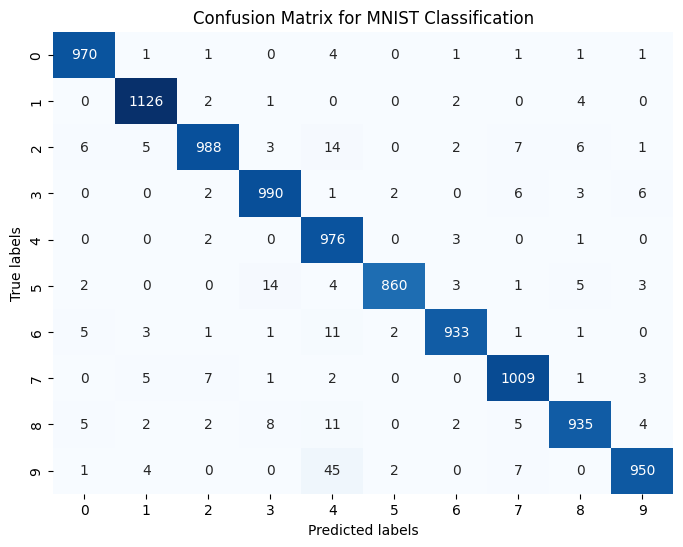

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Classification with a Convolutional Neural Network



### Types of Layers and Keras Syntax

* Conv2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    * The first number is the number of filters (dimensionality of the output)
    * The tuple is the stride (the width and height of the section of pixels to be reduced down)
    * Activation has the same function here as in regular neural networks
    * Convolutional layers apply learnable filters to the data that creates a feature map to a higher or lower dimensional space
    * Used to detect important features and patterns in the data
* MaxPooling2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)
    * Tuple is the pool size (the size block over which to find the maximum)
    * Pooling layers reduce the dimensionality of the data while keeping the most important features
    * Two types of pooling layers: max pooling and average pooling
* Stacking convolutional and pooling layers allows CNNS to learn in a heirarchical manner
    * First the networks learns basic featutes of the data (like edges and textures) and then more complicated features
    * This heirarchical learning is what makes CNNS so effective at image analysis
* Note that not every convolutional layer has to be followed by a pooling layer, too many pooling layers can be bad

### Full Neural Network for Classification
* Have two pairs of convolutional layers/pooling layers of different sizes followed by a lone convolutional layer
* The `Flatten()` layer is needed to take the 2D data down to one dimension for the dense layers
* The first dense layer (a hidden layer) does some post-processing on the data that comes from the CNN layers, the second dense layer is the output layer

In [11]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* Model is compiled, trained, and tested in the same way as the regular neural network

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


  1/844 [..............................] - ETA: 2:07 - loss: 2.3013 - accuracy: 0.1250

  7/844 [..............................] - ETA: 8s - loss: 2.2626 - accuracy: 0.1094  

 12/844 [..............................] - ETA: 8s - loss: 2.1992 - accuracy: 0.2214

 18/844 [..............................] - ETA: 8s - loss: 2.0708 - accuracy: 0.3194

 24/844 [..............................] - ETA: 8s - loss: 1.8892 - accuracy: 0.3952

 29/844 [>.............................] - ETA: 8s - loss: 1.7215 - accuracy: 0.4558

 34/844 [>.............................] - ETA: 8s - loss: 1.5754 - accuracy: 0.5032

 40/844 [>.............................] - ETA: 8s - loss: 1.4366 - accuracy: 0.5480

 45/844 [>.............................] - ETA: 8s - loss: 1.3359 - accuracy: 0.5813

 51/844 [>.............................] - ETA: 7s - loss: 1.2444 - accuracy: 0.6109

 56/844 [>.............................] - ETA: 7s - loss: 1.1759 - accuracy: 0.6323

 61/844 [=>............................] - ETA: 7s - loss: 1.1143 - accuracy: 0.6509

 66/844 [=>............................] - ETA: 7s - loss: 1.0666 - accuracy: 0.6655

 72/844 [=>............................] - ETA: 7s - loss: 1.0129 - accuracy: 0.6827

 77/844 [=>............................] - ETA: 7s - loss: 0.9674 - accuracy: 0.6962

 82/844 [=>............................] - ETA: 7s - loss: 0.9269 - accuracy: 0.7087

 88/844 [==>...........................] - ETA: 7s - loss: 0.8858 - accuracy: 0.7216

 93/844 [==>...........................] - ETA: 7s - loss: 0.8540 - accuracy: 0.7315

 98/844 [==>...........................] - ETA: 7s - loss: 0.8276 - accuracy: 0.7403

103/844 [==>...........................] - ETA: 7s - loss: 0.8031 - accuracy: 0.7482

109/844 [==>...........................] - ETA: 7s - loss: 0.7783 - accuracy: 0.7566

114/844 [===>..........................] - ETA: 7s - loss: 0.7554 - accuracy: 0.7640

119/844 [===>..........................] - ETA: 7s - loss: 0.7360 - accuracy: 0.7698

124/844 [===>..........................] - ETA: 7s - loss: 0.7150 - accuracy: 0.7762

129/844 [===>..........................] - ETA: 7s - loss: 0.6983 - accuracy: 0.7812

134/844 [===>..........................] - ETA: 7s - loss: 0.6803 - accuracy: 0.7865

139/844 [===>..........................] - ETA: 7s - loss: 0.6623 - accuracy: 0.7923

144/844 [====>.........................] - ETA: 7s - loss: 0.6457 - accuracy: 0.7974

149/844 [====>.........................] - ETA: 7s - loss: 0.6292 - accuracy: 0.8022

154/844 [====>.........................] - ETA: 7s - loss: 0.6146 - accuracy: 0.8071

159/844 [====>.........................] - ETA: 7s - loss: 0.6015 - accuracy: 0.8111

164/844 [====>.........................] - ETA: 6s - loss: 0.5918 - accuracy: 0.8147

169/844 [=====>........................] - ETA: 6s - loss: 0.5782 - accuracy: 0.8192

174/844 [=====>........................] - ETA: 6s - loss: 0.5664 - accuracy: 0.8231

179/844 [=====>........................] - ETA: 6s - loss: 0.5554 - accuracy: 0.8263

184/844 [=====>........................] - ETA: 6s - loss: 0.5451 - accuracy: 0.8297

189/844 [=====>........................] - ETA: 6s - loss: 0.5343 - accuracy: 0.8330

194/844 [=====>........................] - ETA: 6s - loss: 0.5253 - accuracy: 0.8359

199/844 [======>.......................] - ETA: 6s - loss: 0.5157 - accuracy: 0.8386

204/844 [======>.......................] - ETA: 6s - loss: 0.5082 - accuracy: 0.8408

209/844 [======>.......................] - ETA: 6s - loss: 0.5002 - accuracy: 0.8432

214/844 [======>.......................] - ETA: 6s - loss: 0.4918 - accuracy: 0.8462

219/844 [======>.......................] - ETA: 6s - loss: 0.4841 - accuracy: 0.8485

224/844 [======>.......................] - ETA: 6s - loss: 0.4765 - accuracy: 0.8510

229/844 [=======>......................] - ETA: 6s - loss: 0.4687 - accuracy: 0.8536

234/844 [=======>......................] - ETA: 6s - loss: 0.4624 - accuracy: 0.8556

239/844 [=======>......................] - ETA: 6s - loss: 0.4557 - accuracy: 0.8575

244/844 [=======>......................] - ETA: 6s - loss: 0.4493 - accuracy: 0.8594

249/844 [=======>......................] - ETA: 6s - loss: 0.4435 - accuracy: 0.8610

254/844 [========>.....................] - ETA: 6s - loss: 0.4374 - accuracy: 0.8631

259/844 [========>.....................] - ETA: 6s - loss: 0.4311 - accuracy: 0.8651

264/844 [========>.....................] - ETA: 6s - loss: 0.4251 - accuracy: 0.8670

269/844 [========>.....................] - ETA: 5s - loss: 0.4192 - accuracy: 0.8687

274/844 [========>.....................] - ETA: 5s - loss: 0.4135 - accuracy: 0.8706

279/844 [========>.....................] - ETA: 5s - loss: 0.4076 - accuracy: 0.8724

284/844 [=========>....................] - ETA: 5s - loss: 0.4019 - accuracy: 0.8742

289/844 [=========>....................] - ETA: 5s - loss: 0.3985 - accuracy: 0.8754

294/844 [=========>....................] - ETA: 5s - loss: 0.3932 - accuracy: 0.8771

299/844 [=========>....................] - ETA: 5s - loss: 0.3890 - accuracy: 0.8784

304/844 [=========>....................] - ETA: 5s - loss: 0.3847 - accuracy: 0.8797

309/844 [=========>....................] - ETA: 5s - loss: 0.3800 - accuracy: 0.8810

314/844 [==========>...................] - ETA: 5s - loss: 0.3757 - accuracy: 0.8824

319/844 [==========>...................] - ETA: 5s - loss: 0.3714 - accuracy: 0.8837

324/844 [==========>...................] - ETA: 5s - loss: 0.3683 - accuracy: 0.8845

329/844 [==========>...................] - ETA: 5s - loss: 0.3641 - accuracy: 0.8857

334/844 [==========>...................] - ETA: 5s - loss: 0.3612 - accuracy: 0.8866

339/844 [===========>..................] - ETA: 5s - loss: 0.3578 - accuracy: 0.8878

344/844 [===========>..................] - ETA: 5s - loss: 0.3542 - accuracy: 0.8890

349/844 [===========>..................] - ETA: 5s - loss: 0.3513 - accuracy: 0.8899

354/844 [===========>..................] - ETA: 5s - loss: 0.3486 - accuracy: 0.8905

359/844 [===========>..................] - ETA: 5s - loss: 0.3460 - accuracy: 0.8913

364/844 [===========>..................] - ETA: 5s - loss: 0.3426 - accuracy: 0.8925

369/844 [============>.................] - ETA: 4s - loss: 0.3396 - accuracy: 0.8935

374/844 [============>.................] - ETA: 4s - loss: 0.3363 - accuracy: 0.8945

379/844 [============>.................] - ETA: 4s - loss: 0.3335 - accuracy: 0.8954

384/844 [============>.................] - ETA: 4s - loss: 0.3307 - accuracy: 0.8961

388/844 [============>.................] - ETA: 4s - loss: 0.3280 - accuracy: 0.8969

393/844 [============>.................] - ETA: 4s - loss: 0.3247 - accuracy: 0.8979

398/844 [=============>................] - ETA: 4s - loss: 0.3222 - accuracy: 0.8986

403/844 [=============>................] - ETA: 4s - loss: 0.3194 - accuracy: 0.8996

408/844 [=============>................] - ETA: 4s - loss: 0.3165 - accuracy: 0.9006

413/844 [=============>................] - ETA: 4s - loss: 0.3142 - accuracy: 0.9012

418/844 [=============>................] - ETA: 4s - loss: 0.3113 - accuracy: 0.9021

423/844 [==============>...............] - ETA: 4s - loss: 0.3094 - accuracy: 0.9026

428/844 [==============>...............] - ETA: 4s - loss: 0.3066 - accuracy: 0.9034

433/844 [==============>...............] - ETA: 4s - loss: 0.3047 - accuracy: 0.9042

438/844 [==============>...............] - ETA: 4s - loss: 0.3020 - accuracy: 0.9051

443/844 [==============>...............] - ETA: 4s - loss: 0.3000 - accuracy: 0.9058

448/844 [==============>...............] - ETA: 4s - loss: 0.2982 - accuracy: 0.9065

453/844 [===============>..............] - ETA: 4s - loss: 0.2959 - accuracy: 0.9071

458/844 [===============>..............] - ETA: 4s - loss: 0.2941 - accuracy: 0.9079

463/844 [===============>..............] - ETA: 4s - loss: 0.2917 - accuracy: 0.9086

468/844 [===============>..............] - ETA: 3s - loss: 0.2892 - accuracy: 0.9093

473/844 [===============>..............] - ETA: 3s - loss: 0.2874 - accuracy: 0.9099

478/844 [===============>..............] - ETA: 3s - loss: 0.2855 - accuracy: 0.9105

483/844 [================>.............] - ETA: 3s - loss: 0.2833 - accuracy: 0.9112

488/844 [================>.............] - ETA: 3s - loss: 0.2812 - accuracy: 0.9119

493/844 [================>.............] - ETA: 3s - loss: 0.2797 - accuracy: 0.9123

498/844 [================>.............] - ETA: 3s - loss: 0.2777 - accuracy: 0.9129

503/844 [================>.............] - ETA: 3s - loss: 0.2757 - accuracy: 0.9136

508/844 [=================>............] - ETA: 3s - loss: 0.2738 - accuracy: 0.9142

513/844 [=================>............] - ETA: 3s - loss: 0.2719 - accuracy: 0.9147

518/844 [=================>............] - ETA: 3s - loss: 0.2699 - accuracy: 0.9154

523/844 [=================>............] - ETA: 3s - loss: 0.2687 - accuracy: 0.9158

528/844 [=================>............] - ETA: 3s - loss: 0.2669 - accuracy: 0.9164

533/844 [=================>............] - ETA: 3s - loss: 0.2653 - accuracy: 0.9168

538/844 [==================>...........] - ETA: 3s - loss: 0.2638 - accuracy: 0.9172

543/844 [==================>...........] - ETA: 3s - loss: 0.2624 - accuracy: 0.9176

548/844 [==================>...........] - ETA: 3s - loss: 0.2605 - accuracy: 0.9182

553/844 [==================>...........] - ETA: 3s - loss: 0.2590 - accuracy: 0.9187

558/844 [==================>...........] - ETA: 3s - loss: 0.2575 - accuracy: 0.9191

563/844 [===================>..........] - ETA: 2s - loss: 0.2559 - accuracy: 0.9195

568/844 [===================>..........] - ETA: 2s - loss: 0.2545 - accuracy: 0.9199

573/844 [===================>..........] - ETA: 2s - loss: 0.2529 - accuracy: 0.9204

578/844 [===================>..........] - ETA: 2s - loss: 0.2514 - accuracy: 0.9209

583/844 [===================>..........] - ETA: 2s - loss: 0.2503 - accuracy: 0.9213

588/844 [===================>..........] - ETA: 2s - loss: 0.2488 - accuracy: 0.9218

593/844 [====================>.........] - ETA: 2s - loss: 0.2478 - accuracy: 0.9220

598/844 [====================>.........] - ETA: 2s - loss: 0.2464 - accuracy: 0.9225

603/844 [====================>.........] - ETA: 2s - loss: 0.2448 - accuracy: 0.9230

608/844 [====================>.........] - ETA: 2s - loss: 0.2433 - accuracy: 0.9234

613/844 [====================>.........] - ETA: 2s - loss: 0.2422 - accuracy: 0.9237

618/844 [====================>.........] - ETA: 2s - loss: 0.2410 - accuracy: 0.9241

623/844 [=====================>........] - ETA: 2s - loss: 0.2396 - accuracy: 0.9245

628/844 [=====================>........] - ETA: 2s - loss: 0.2382 - accuracy: 0.9249

633/844 [=====================>........] - ETA: 2s - loss: 0.2373 - accuracy: 0.9253

638/844 [=====================>........] - ETA: 2s - loss: 0.2363 - accuracy: 0.9256

643/844 [=====================>........] - ETA: 2s - loss: 0.2351 - accuracy: 0.9259

648/844 [======================>.......] - ETA: 2s - loss: 0.2340 - accuracy: 0.9262

653/844 [======================>.......] - ETA: 2s - loss: 0.2326 - accuracy: 0.9266

658/844 [======================>.......] - ETA: 1s - loss: 0.2314 - accuracy: 0.9270

663/844 [======================>.......] - ETA: 1s - loss: 0.2302 - accuracy: 0.9274

668/844 [======================>.......] - ETA: 1s - loss: 0.2289 - accuracy: 0.9277

673/844 [======================>.......] - ETA: 1s - loss: 0.2282 - accuracy: 0.9280

678/844 [=======================>......] - ETA: 1s - loss: 0.2272 - accuracy: 0.9284

683/844 [=======================>......] - ETA: 1s - loss: 0.2265 - accuracy: 0.9287

688/844 [=======================>......] - ETA: 1s - loss: 0.2254 - accuracy: 0.9289

693/844 [=======================>......] - ETA: 1s - loss: 0.2241 - accuracy: 0.9294

698/844 [=======================>......] - ETA: 1s - loss: 0.2230 - accuracy: 0.9298

703/844 [=======================>......] - ETA: 1s - loss: 0.2219 - accuracy: 0.9301

708/844 [========================>.....] - ETA: 1s - loss: 0.2208 - accuracy: 0.9304

713/844 [========================>.....] - ETA: 1s - loss: 0.2196 - accuracy: 0.9308

718/844 [========================>.....] - ETA: 1s - loss: 0.2188 - accuracy: 0.9311

723/844 [========================>.....] - ETA: 1s - loss: 0.2178 - accuracy: 0.9314

728/844 [========================>.....] - ETA: 1s - loss: 0.2169 - accuracy: 0.9317

733/844 [=========================>....] - ETA: 1s - loss: 0.2163 - accuracy: 0.9319

738/844 [=========================>....] - ETA: 1s - loss: 0.2153 - accuracy: 0.9322

743/844 [=========================>....] - ETA: 1s - loss: 0.2142 - accuracy: 0.9326

748/844 [=========================>....] - ETA: 1s - loss: 0.2130 - accuracy: 0.9329

753/844 [=========================>....] - ETA: 0s - loss: 0.2120 - accuracy: 0.9332

758/844 [=========================>....] - ETA: 0s - loss: 0.2111 - accuracy: 0.9335

763/844 [==========================>...] - ETA: 0s - loss: 0.2099 - accuracy: 0.9338

768/844 [==========================>...] - ETA: 0s - loss: 0.2090 - accuracy: 0.9341

773/844 [==========================>...] - ETA: 0s - loss: 0.2080 - accuracy: 0.9344

778/844 [==========================>...] - ETA: 0s - loss: 0.2071 - accuracy: 0.9347

783/844 [==========================>...] - ETA: 0s - loss: 0.2062 - accuracy: 0.9350

788/844 [===========================>..] - ETA: 0s - loss: 0.2052 - accuracy: 0.9352

793/844 [===========================>..] - ETA: 0s - loss: 0.2044 - accuracy: 0.9355

798/844 [===========================>..] - ETA: 0s - loss: 0.2034 - accuracy: 0.9358

803/844 [===========================>..] - ETA: 0s - loss: 0.2026 - accuracy: 0.9360

808/844 [===========================>..] - ETA: 0s - loss: 0.2018 - accuracy: 0.9362

813/844 [===========================>..] - ETA: 0s - loss: 0.2009 - accuracy: 0.9365

818/844 [============================>.] - ETA: 0s - loss: 0.1999 - accuracy: 0.9368

823/844 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9370

827/844 [============================>.] - ETA: 0s - loss: 0.1983 - accuracy: 0.9373

832/844 [============================>.] - ETA: 0s - loss: 0.1975 - accuracy: 0.9375

837/844 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9378

841/844 [============================>.] - ETA: 0s - loss: 0.1959 - accuracy: 0.9380

844/844 [==============================] - 10s 11ms/step - loss: 0.1955 - accuracy: 0.9381 - val_loss: 0.0505 - val_accuracy: 0.9848


Epoch 2/5


  1/844 [..............................] - ETA: 11s - loss: 0.0279 - accuracy: 0.9844

  6/844 [..............................] - ETA: 9s - loss: 0.0409 - accuracy: 0.9844 

 11/844 [..............................] - ETA: 9s - loss: 0.0402 - accuracy: 0.9872

 16/844 [..............................] - ETA: 9s - loss: 0.0468 - accuracy: 0.9854

 21/844 [..............................] - ETA: 9s - loss: 0.0517 - accuracy: 0.9851

 26/844 [..............................] - ETA: 9s - loss: 0.0538 - accuracy: 0.9832

 31/844 [>.............................] - ETA: 9s - loss: 0.0543 - accuracy: 0.9824

 36/844 [>.............................] - ETA: 9s - loss: 0.0559 - accuracy: 0.9822

 41/844 [>.............................] - ETA: 9s - loss: 0.0536 - accuracy: 0.9836

 46/844 [>.............................] - ETA: 9s - loss: 0.0552 - accuracy: 0.9834

 51/844 [>.............................] - ETA: 9s - loss: 0.0554 - accuracy: 0.9828

 56/844 [>.............................] - ETA: 9s - loss: 0.0558 - accuracy: 0.9824

 61/844 [=>............................] - ETA: 8s - loss: 0.0554 - accuracy: 0.9818

 66/844 [=>............................] - ETA: 8s - loss: 0.0583 - accuracy: 0.9808

 71/844 [=>............................] - ETA: 8s - loss: 0.0575 - accuracy: 0.9806

 76/844 [=>............................] - ETA: 8s - loss: 0.0556 - accuracy: 0.9811

 81/844 [=>............................] - ETA: 8s - loss: 0.0547 - accuracy: 0.9815

 86/844 [==>...........................] - ETA: 8s - loss: 0.0568 - accuracy: 0.9807

 91/844 [==>...........................] - ETA: 8s - loss: 0.0576 - accuracy: 0.9803

 96/844 [==>...........................] - ETA: 8s - loss: 0.0568 - accuracy: 0.9808

101/844 [==>...........................] - ETA: 8s - loss: 0.0572 - accuracy: 0.9807

106/844 [==>...........................] - ETA: 8s - loss: 0.0577 - accuracy: 0.9802

111/844 [==>...........................] - ETA: 8s - loss: 0.0584 - accuracy: 0.9802

116/844 [===>..........................] - ETA: 8s - loss: 0.0591 - accuracy: 0.9801

121/844 [===>..........................] - ETA: 8s - loss: 0.0579 - accuracy: 0.9804

126/844 [===>..........................] - ETA: 8s - loss: 0.0580 - accuracy: 0.9802

131/844 [===>..........................] - ETA: 8s - loss: 0.0582 - accuracy: 0.9797

136/844 [===>..........................] - ETA: 8s - loss: 0.0573 - accuracy: 0.9801

141/844 [====>.........................] - ETA: 8s - loss: 0.0570 - accuracy: 0.9799

146/844 [====>.........................] - ETA: 8s - loss: 0.0572 - accuracy: 0.9797

151/844 [====>.........................] - ETA: 7s - loss: 0.0563 - accuracy: 0.9799

156/844 [====>.........................] - ETA: 7s - loss: 0.0575 - accuracy: 0.9796

161/844 [====>.........................] - ETA: 7s - loss: 0.0569 - accuracy: 0.9799

166/844 [====>.........................] - ETA: 7s - loss: 0.0565 - accuracy: 0.9800

171/844 [=====>........................] - ETA: 7s - loss: 0.0573 - accuracy: 0.9800

176/844 [=====>........................] - ETA: 7s - loss: 0.0579 - accuracy: 0.9801

181/844 [=====>........................] - ETA: 7s - loss: 0.0570 - accuracy: 0.9804

186/844 [=====>........................] - ETA: 7s - loss: 0.0574 - accuracy: 0.9803

191/844 [=====>........................] - ETA: 7s - loss: 0.0569 - accuracy: 0.9803

196/844 [=====>........................] - ETA: 7s - loss: 0.0567 - accuracy: 0.9802

201/844 [======>.......................] - ETA: 7s - loss: 0.0565 - accuracy: 0.9804

206/844 [======>.......................] - ETA: 7s - loss: 0.0559 - accuracy: 0.9807

211/844 [======>.......................] - ETA: 7s - loss: 0.0551 - accuracy: 0.9810

216/844 [======>.......................] - ETA: 7s - loss: 0.0552 - accuracy: 0.9810

221/844 [======>.......................] - ETA: 7s - loss: 0.0558 - accuracy: 0.9811

226/844 [=======>......................] - ETA: 6s - loss: 0.0557 - accuracy: 0.9813

231/844 [=======>......................] - ETA: 6s - loss: 0.0561 - accuracy: 0.9810

236/844 [=======>......................] - ETA: 6s - loss: 0.0563 - accuracy: 0.9809

241/844 [=======>......................] - ETA: 6s - loss: 0.0560 - accuracy: 0.9811

247/844 [=======>......................] - ETA: 6s - loss: 0.0559 - accuracy: 0.9812

252/844 [=======>......................] - ETA: 6s - loss: 0.0565 - accuracy: 0.9809

257/844 [========>.....................] - ETA: 6s - loss: 0.0559 - accuracy: 0.9812

262/844 [========>.....................] - ETA: 6s - loss: 0.0574 - accuracy: 0.9809

267/844 [========>.....................] - ETA: 6s - loss: 0.0576 - accuracy: 0.9807

272/844 [========>.....................] - ETA: 6s - loss: 0.0579 - accuracy: 0.9808

277/844 [========>.....................] - ETA: 6s - loss: 0.0574 - accuracy: 0.9809

282/844 [=========>....................] - ETA: 6s - loss: 0.0568 - accuracy: 0.9811

287/844 [=========>....................] - ETA: 6s - loss: 0.0567 - accuracy: 0.9812

292/844 [=========>....................] - ETA: 6s - loss: 0.0566 - accuracy: 0.9813

297/844 [=========>....................] - ETA: 6s - loss: 0.0565 - accuracy: 0.9813

302/844 [=========>....................] - ETA: 6s - loss: 0.0567 - accuracy: 0.9814

307/844 [=========>....................] - ETA: 6s - loss: 0.0565 - accuracy: 0.9814

312/844 [==========>...................] - ETA: 5s - loss: 0.0562 - accuracy: 0.9815

317/844 [==========>...................] - ETA: 5s - loss: 0.0566 - accuracy: 0.9813

322/844 [==========>...................] - ETA: 5s - loss: 0.0565 - accuracy: 0.9813

327/844 [==========>...................] - ETA: 5s - loss: 0.0568 - accuracy: 0.9812

332/844 [==========>...................] - ETA: 5s - loss: 0.0563 - accuracy: 0.9815

337/844 [==========>...................] - ETA: 5s - loss: 0.0557 - accuracy: 0.9817

342/844 [===========>..................] - ETA: 5s - loss: 0.0555 - accuracy: 0.9817

347/844 [===========>..................] - ETA: 5s - loss: 0.0556 - accuracy: 0.9817

352/844 [===========>..................] - ETA: 5s - loss: 0.0553 - accuracy: 0.9818

357/844 [===========>..................] - ETA: 5s - loss: 0.0552 - accuracy: 0.9818

362/844 [===========>..................] - ETA: 5s - loss: 0.0550 - accuracy: 0.9819

367/844 [============>.................] - ETA: 5s - loss: 0.0551 - accuracy: 0.9819

372/844 [============>.................] - ETA: 5s - loss: 0.0546 - accuracy: 0.9821

377/844 [============>.................] - ETA: 5s - loss: 0.0546 - accuracy: 0.9821

382/844 [============>.................] - ETA: 5s - loss: 0.0542 - accuracy: 0.9822

386/844 [============>.................] - ETA: 5s - loss: 0.0539 - accuracy: 0.9823

390/844 [============>.................] - ETA: 5s - loss: 0.0540 - accuracy: 0.9823

393/844 [============>.................] - ETA: 5s - loss: 0.0538 - accuracy: 0.9824

396/844 [=============>................] - ETA: 5s - loss: 0.0543 - accuracy: 0.9823

400/844 [=============>................] - ETA: 5s - loss: 0.0542 - accuracy: 0.9824

403/844 [=============>................] - ETA: 5s - loss: 0.0540 - accuracy: 0.9825

406/844 [=============>................] - ETA: 5s - loss: 0.0539 - accuracy: 0.9825

411/844 [=============>................] - ETA: 4s - loss: 0.0542 - accuracy: 0.9824

416/844 [=============>................] - ETA: 4s - loss: 0.0539 - accuracy: 0.9825

420/844 [=============>................] - ETA: 4s - loss: 0.0539 - accuracy: 0.9825

425/844 [==============>...............] - ETA: 4s - loss: 0.0537 - accuracy: 0.9825

430/844 [==============>...............] - ETA: 4s - loss: 0.0543 - accuracy: 0.9824

435/844 [==============>...............] - ETA: 4s - loss: 0.0545 - accuracy: 0.9824

440/844 [==============>...............] - ETA: 4s - loss: 0.0546 - accuracy: 0.9822

445/844 [==============>...............] - ETA: 4s - loss: 0.0544 - accuracy: 0.9823

450/844 [==============>...............] - ETA: 4s - loss: 0.0543 - accuracy: 0.9823

455/844 [===============>..............] - ETA: 4s - loss: 0.0541 - accuracy: 0.9824

460/844 [===============>..............] - ETA: 4s - loss: 0.0539 - accuracy: 0.9825

465/844 [===============>..............] - ETA: 4s - loss: 0.0540 - accuracy: 0.9825

470/844 [===============>..............] - ETA: 4s - loss: 0.0539 - accuracy: 0.9825

475/844 [===============>..............] - ETA: 4s - loss: 0.0537 - accuracy: 0.9826

480/844 [================>.............] - ETA: 4s - loss: 0.0538 - accuracy: 0.9826

485/844 [================>.............] - ETA: 4s - loss: 0.0536 - accuracy: 0.9826

490/844 [================>.............] - ETA: 4s - loss: 0.0538 - accuracy: 0.9826

495/844 [================>.............] - ETA: 4s - loss: 0.0537 - accuracy: 0.9826

500/844 [================>.............] - ETA: 3s - loss: 0.0540 - accuracy: 0.9826

505/844 [================>.............] - ETA: 3s - loss: 0.0539 - accuracy: 0.9826

510/844 [=================>............] - ETA: 3s - loss: 0.0537 - accuracy: 0.9827

515/844 [=================>............] - ETA: 3s - loss: 0.0537 - accuracy: 0.9827

520/844 [=================>............] - ETA: 3s - loss: 0.0535 - accuracy: 0.9827

525/844 [=================>............] - ETA: 3s - loss: 0.0538 - accuracy: 0.9827

530/844 [=================>............] - ETA: 3s - loss: 0.0536 - accuracy: 0.9827

535/844 [==================>...........] - ETA: 3s - loss: 0.0534 - accuracy: 0.9828

540/844 [==================>...........] - ETA: 3s - loss: 0.0535 - accuracy: 0.9828

545/844 [==================>...........] - ETA: 3s - loss: 0.0533 - accuracy: 0.9829

550/844 [==================>...........] - ETA: 3s - loss: 0.0532 - accuracy: 0.9829

555/844 [==================>...........] - ETA: 3s - loss: 0.0529 - accuracy: 0.9830

560/844 [==================>...........] - ETA: 3s - loss: 0.0527 - accuracy: 0.9830

565/844 [===================>..........] - ETA: 3s - loss: 0.0526 - accuracy: 0.9830

570/844 [===================>..........] - ETA: 3s - loss: 0.0528 - accuracy: 0.9829

575/844 [===================>..........] - ETA: 3s - loss: 0.0530 - accuracy: 0.9830

580/844 [===================>..........] - ETA: 3s - loss: 0.0534 - accuracy: 0.9828

585/844 [===================>..........] - ETA: 2s - loss: 0.0532 - accuracy: 0.9829

590/844 [===================>..........] - ETA: 2s - loss: 0.0531 - accuracy: 0.9829

595/844 [====================>.........] - ETA: 2s - loss: 0.0531 - accuracy: 0.9830

600/844 [====================>.........] - ETA: 2s - loss: 0.0532 - accuracy: 0.9828

605/844 [====================>.........] - ETA: 2s - loss: 0.0534 - accuracy: 0.9828

610/844 [====================>.........] - ETA: 2s - loss: 0.0532 - accuracy: 0.9829

615/844 [====================>.........] - ETA: 2s - loss: 0.0531 - accuracy: 0.9830

620/844 [=====================>........] - ETA: 2s - loss: 0.0531 - accuracy: 0.9830

625/844 [=====================>........] - ETA: 2s - loss: 0.0529 - accuracy: 0.9830

630/844 [=====================>........] - ETA: 2s - loss: 0.0532 - accuracy: 0.9830

635/844 [=====================>........] - ETA: 2s - loss: 0.0530 - accuracy: 0.9831

640/844 [=====================>........] - ETA: 2s - loss: 0.0529 - accuracy: 0.9831

645/844 [=====================>........] - ETA: 2s - loss: 0.0529 - accuracy: 0.9831

650/844 [======================>.......] - ETA: 2s - loss: 0.0531 - accuracy: 0.9830

655/844 [======================>.......] - ETA: 2s - loss: 0.0529 - accuracy: 0.9831

659/844 [======================>.......] - ETA: 2s - loss: 0.0528 - accuracy: 0.9831

664/844 [======================>.......] - ETA: 2s - loss: 0.0527 - accuracy: 0.9832

669/844 [======================>.......] - ETA: 2s - loss: 0.0527 - accuracy: 0.9832

674/844 [======================>.......] - ETA: 1s - loss: 0.0526 - accuracy: 0.9833

679/844 [=======================>......] - ETA: 1s - loss: 0.0523 - accuracy: 0.9834

684/844 [=======================>......] - ETA: 1s - loss: 0.0522 - accuracy: 0.9834

689/844 [=======================>......] - ETA: 1s - loss: 0.0522 - accuracy: 0.9833

694/844 [=======================>......] - ETA: 1s - loss: 0.0522 - accuracy: 0.9832

699/844 [=======================>......] - ETA: 1s - loss: 0.0523 - accuracy: 0.9832

704/844 [========================>.....] - ETA: 1s - loss: 0.0521 - accuracy: 0.9832

709/844 [========================>.....] - ETA: 1s - loss: 0.0519 - accuracy: 0.9833

714/844 [========================>.....] - ETA: 1s - loss: 0.0524 - accuracy: 0.9832

719/844 [========================>.....] - ETA: 1s - loss: 0.0524 - accuracy: 0.9832

724/844 [========================>.....] - ETA: 1s - loss: 0.0523 - accuracy: 0.9832

729/844 [========================>.....] - ETA: 1s - loss: 0.0524 - accuracy: 0.9832

734/844 [=========================>....] - ETA: 1s - loss: 0.0524 - accuracy: 0.9832

739/844 [=========================>....] - ETA: 1s - loss: 0.0524 - accuracy: 0.9832

744/844 [=========================>....] - ETA: 1s - loss: 0.0522 - accuracy: 0.9833

749/844 [=========================>....] - ETA: 1s - loss: 0.0522 - accuracy: 0.9832

754/844 [=========================>....] - ETA: 1s - loss: 0.0521 - accuracy: 0.9832

759/844 [=========================>....] - ETA: 0s - loss: 0.0520 - accuracy: 0.9833

764/844 [==========================>...] - ETA: 0s - loss: 0.0518 - accuracy: 0.9834

769/844 [==========================>...] - ETA: 0s - loss: 0.0517 - accuracy: 0.9834

774/844 [==========================>...] - ETA: 0s - loss: 0.0516 - accuracy: 0.9834

779/844 [==========================>...] - ETA: 0s - loss: 0.0516 - accuracy: 0.9834

784/844 [==========================>...] - ETA: 0s - loss: 0.0515 - accuracy: 0.9835

789/844 [===========================>..] - ETA: 0s - loss: 0.0519 - accuracy: 0.9834

794/844 [===========================>..] - ETA: 0s - loss: 0.0519 - accuracy: 0.9834

799/844 [===========================>..] - ETA: 0s - loss: 0.0518 - accuracy: 0.9835

804/844 [===========================>..] - ETA: 0s - loss: 0.0517 - accuracy: 0.9836

809/844 [===========================>..] - ETA: 0s - loss: 0.0517 - accuracy: 0.9835

813/844 [===========================>..] - ETA: 0s - loss: 0.0518 - accuracy: 0.9835

818/844 [============================>.] - ETA: 0s - loss: 0.0517 - accuracy: 0.9836

823/844 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9835

828/844 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9836

832/844 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9836

836/844 [============================>.] - ETA: 0s - loss: 0.0517 - accuracy: 0.9836

840/844 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9836

843/844 [============================>.] - ETA: 0s - loss: 0.0517 - accuracy: 0.9837

844/844 [==============================] - 10s 12ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0498 - val_accuracy: 0.9833


Epoch 3/5


  1/844 [..............................] - ETA: 8s - loss: 0.0140 - accuracy: 1.0000

  6/844 [..............................] - ETA: 9s - loss: 0.0577 - accuracy: 0.9870

 11/844 [..............................] - ETA: 9s - loss: 0.0470 - accuracy: 0.9886

 16/844 [..............................] - ETA: 9s - loss: 0.0388 - accuracy: 0.9912

 21/844 [..............................] - ETA: 9s - loss: 0.0340 - accuracy: 0.9926

 26/844 [..............................] - ETA: 9s - loss: 0.0329 - accuracy: 0.9934

 31/844 [>.............................] - ETA: 9s - loss: 0.0346 - accuracy: 0.9924

 36/844 [>.............................] - ETA: 9s - loss: 0.0347 - accuracy: 0.9918

 41/844 [>.............................] - ETA: 9s - loss: 0.0340 - accuracy: 0.9916

 46/844 [>.............................] - ETA: 9s - loss: 0.0321 - accuracy: 0.9918

 51/844 [>.............................] - ETA: 9s - loss: 0.0326 - accuracy: 0.9914

 56/844 [>.............................] - ETA: 8s - loss: 0.0328 - accuracy: 0.9914

 61/844 [=>............................] - ETA: 8s - loss: 0.0351 - accuracy: 0.9910

 66/844 [=>............................] - ETA: 8s - loss: 0.0381 - accuracy: 0.9901

 71/844 [=>............................] - ETA: 8s - loss: 0.0362 - accuracy: 0.9908

 76/844 [=>............................] - ETA: 8s - loss: 0.0360 - accuracy: 0.9907

 81/844 [=>............................] - ETA: 8s - loss: 0.0355 - accuracy: 0.9904

 86/844 [==>...........................] - ETA: 8s - loss: 0.0346 - accuracy: 0.9907

 91/844 [==>...........................] - ETA: 8s - loss: 0.0342 - accuracy: 0.9907

 96/844 [==>...........................] - ETA: 8s - loss: 0.0357 - accuracy: 0.9904

101/844 [==>...........................] - ETA: 8s - loss: 0.0359 - accuracy: 0.9903

106/844 [==>...........................] - ETA: 8s - loss: 0.0352 - accuracy: 0.9901

111/844 [==>...........................] - ETA: 8s - loss: 0.0344 - accuracy: 0.9901

116/844 [===>..........................] - ETA: 8s - loss: 0.0344 - accuracy: 0.9899

121/844 [===>..........................] - ETA: 8s - loss: 0.0338 - accuracy: 0.9899

126/844 [===>..........................] - ETA: 8s - loss: 0.0335 - accuracy: 0.9898

131/844 [===>..........................] - ETA: 8s - loss: 0.0336 - accuracy: 0.9897

136/844 [===>..........................] - ETA: 8s - loss: 0.0343 - accuracy: 0.9895

141/844 [====>.........................] - ETA: 8s - loss: 0.0349 - accuracy: 0.9894

146/844 [====>.........................] - ETA: 8s - loss: 0.0350 - accuracy: 0.9893

151/844 [====>.........................] - ETA: 8s - loss: 0.0345 - accuracy: 0.9895

156/844 [====>.........................] - ETA: 7s - loss: 0.0342 - accuracy: 0.9895

161/844 [====>.........................] - ETA: 7s - loss: 0.0355 - accuracy: 0.9891

166/844 [====>.........................] - ETA: 7s - loss: 0.0355 - accuracy: 0.9891

171/844 [=====>........................] - ETA: 7s - loss: 0.0361 - accuracy: 0.9888

176/844 [=====>........................] - ETA: 7s - loss: 0.0356 - accuracy: 0.9889

181/844 [=====>........................] - ETA: 7s - loss: 0.0356 - accuracy: 0.9889

186/844 [=====>........................] - ETA: 7s - loss: 0.0362 - accuracy: 0.9887

191/844 [=====>........................] - ETA: 7s - loss: 0.0364 - accuracy: 0.9886

196/844 [=====>........................] - ETA: 7s - loss: 0.0359 - accuracy: 0.9888

201/844 [======>.......................] - ETA: 7s - loss: 0.0360 - accuracy: 0.9887

206/844 [======>.......................] - ETA: 7s - loss: 0.0356 - accuracy: 0.9889

211/844 [======>.......................] - ETA: 7s - loss: 0.0355 - accuracy: 0.9887

216/844 [======>.......................] - ETA: 7s - loss: 0.0352 - accuracy: 0.9887

221/844 [======>.......................] - ETA: 7s - loss: 0.0350 - accuracy: 0.9887

226/844 [=======>......................] - ETA: 7s - loss: 0.0345 - accuracy: 0.9889

231/844 [=======>......................] - ETA: 7s - loss: 0.0343 - accuracy: 0.9890

236/844 [=======>......................] - ETA: 7s - loss: 0.0340 - accuracy: 0.9891

240/844 [=======>......................] - ETA: 7s - loss: 0.0343 - accuracy: 0.9891

245/844 [=======>......................] - ETA: 6s - loss: 0.0344 - accuracy: 0.9890

250/844 [=======>......................] - ETA: 6s - loss: 0.0341 - accuracy: 0.9890

255/844 [========>.....................] - ETA: 6s - loss: 0.0342 - accuracy: 0.9890

260/844 [========>.....................] - ETA: 6s - loss: 0.0347 - accuracy: 0.9889

265/844 [========>.....................] - ETA: 6s - loss: 0.0355 - accuracy: 0.9888

270/844 [========>.....................] - ETA: 6s - loss: 0.0355 - accuracy: 0.9888

275/844 [========>.....................] - ETA: 6s - loss: 0.0353 - accuracy: 0.9889

280/844 [========>.....................] - ETA: 6s - loss: 0.0360 - accuracy: 0.9887

284/844 [=========>....................] - ETA: 6s - loss: 0.0360 - accuracy: 0.9887

289/844 [=========>....................] - ETA: 6s - loss: 0.0359 - accuracy: 0.9887

294/844 [=========>....................] - ETA: 6s - loss: 0.0364 - accuracy: 0.9886

299/844 [=========>....................] - ETA: 6s - loss: 0.0361 - accuracy: 0.9888

304/844 [=========>....................] - ETA: 6s - loss: 0.0367 - accuracy: 0.9886

309/844 [=========>....................] - ETA: 6s - loss: 0.0371 - accuracy: 0.9886

314/844 [==========>...................] - ETA: 6s - loss: 0.0369 - accuracy: 0.9887

319/844 [==========>...................] - ETA: 6s - loss: 0.0370 - accuracy: 0.9887

324/844 [==========>...................] - ETA: 6s - loss: 0.0369 - accuracy: 0.9887

329/844 [==========>...................] - ETA: 5s - loss: 0.0375 - accuracy: 0.9885

334/844 [==========>...................] - ETA: 5s - loss: 0.0374 - accuracy: 0.9885

339/844 [===========>..................] - ETA: 5s - loss: 0.0374 - accuracy: 0.9885

344/844 [===========>..................] - ETA: 5s - loss: 0.0371 - accuracy: 0.9885

349/844 [===========>..................] - ETA: 5s - loss: 0.0370 - accuracy: 0.9885

354/844 [===========>..................] - ETA: 5s - loss: 0.0369 - accuracy: 0.9886

359/844 [===========>..................] - ETA: 5s - loss: 0.0369 - accuracy: 0.9886

364/844 [===========>..................] - ETA: 5s - loss: 0.0371 - accuracy: 0.9885

369/844 [============>.................] - ETA: 5s - loss: 0.0370 - accuracy: 0.9886

374/844 [============>.................] - ETA: 5s - loss: 0.0367 - accuracy: 0.9886

379/844 [============>.................] - ETA: 5s - loss: 0.0365 - accuracy: 0.9887

382/844 [============>.................] - ETA: 5s - loss: 0.0367 - accuracy: 0.9886

387/844 [============>.................] - ETA: 5s - loss: 0.0366 - accuracy: 0.9887

392/844 [============>.................] - ETA: 5s - loss: 0.0364 - accuracy: 0.9887

397/844 [=============>................] - ETA: 5s - loss: 0.0362 - accuracy: 0.9887

402/844 [=============>................] - ETA: 5s - loss: 0.0363 - accuracy: 0.9887

407/844 [=============>................] - ETA: 5s - loss: 0.0362 - accuracy: 0.9888

412/844 [=============>................] - ETA: 5s - loss: 0.0363 - accuracy: 0.9885

417/844 [=============>................] - ETA: 4s - loss: 0.0365 - accuracy: 0.9885

421/844 [=============>................] - ETA: 4s - loss: 0.0363 - accuracy: 0.9886

426/844 [==============>...............] - ETA: 4s - loss: 0.0363 - accuracy: 0.9886

431/844 [==============>...............] - ETA: 4s - loss: 0.0361 - accuracy: 0.9887

436/844 [==============>...............] - ETA: 4s - loss: 0.0361 - accuracy: 0.9887

441/844 [==============>...............] - ETA: 4s - loss: 0.0358 - accuracy: 0.9887

446/844 [==============>...............] - ETA: 4s - loss: 0.0359 - accuracy: 0.9886

451/844 [===============>..............] - ETA: 4s - loss: 0.0360 - accuracy: 0.9886

456/844 [===============>..............] - ETA: 4s - loss: 0.0358 - accuracy: 0.9887

461/844 [===============>..............] - ETA: 4s - loss: 0.0356 - accuracy: 0.9887

465/844 [===============>..............] - ETA: 4s - loss: 0.0361 - accuracy: 0.9884

470/844 [===============>..............] - ETA: 4s - loss: 0.0363 - accuracy: 0.9883

475/844 [===============>..............] - ETA: 4s - loss: 0.0366 - accuracy: 0.9883

479/844 [================>.............] - ETA: 4s - loss: 0.0365 - accuracy: 0.9883

484/844 [================>.............] - ETA: 4s - loss: 0.0365 - accuracy: 0.9883

488/844 [================>.............] - ETA: 4s - loss: 0.0363 - accuracy: 0.9884

493/844 [================>.............] - ETA: 4s - loss: 0.0367 - accuracy: 0.9884

498/844 [================>.............] - ETA: 4s - loss: 0.0372 - accuracy: 0.9883

503/844 [================>.............] - ETA: 4s - loss: 0.0373 - accuracy: 0.9882

508/844 [=================>............] - ETA: 3s - loss: 0.0376 - accuracy: 0.9882

513/844 [=================>............] - ETA: 3s - loss: 0.0376 - accuracy: 0.9882

517/844 [=================>............] - ETA: 3s - loss: 0.0375 - accuracy: 0.9882

521/844 [=================>............] - ETA: 3s - loss: 0.0375 - accuracy: 0.9882

525/844 [=================>............] - ETA: 3s - loss: 0.0374 - accuracy: 0.9883

530/844 [=================>............] - ETA: 3s - loss: 0.0374 - accuracy: 0.9883

535/844 [==================>...........] - ETA: 3s - loss: 0.0373 - accuracy: 0.9883

540/844 [==================>...........] - ETA: 3s - loss: 0.0372 - accuracy: 0.9883

545/844 [==================>...........] - ETA: 3s - loss: 0.0373 - accuracy: 0.9882

550/844 [==================>...........] - ETA: 3s - loss: 0.0373 - accuracy: 0.9883

555/844 [==================>...........] - ETA: 3s - loss: 0.0374 - accuracy: 0.9882

560/844 [==================>...........] - ETA: 3s - loss: 0.0373 - accuracy: 0.9882

565/844 [===================>..........] - ETA: 3s - loss: 0.0376 - accuracy: 0.9882

570/844 [===================>..........] - ETA: 3s - loss: 0.0381 - accuracy: 0.9881

574/844 [===================>..........] - ETA: 3s - loss: 0.0381 - accuracy: 0.9881

579/844 [===================>..........] - ETA: 3s - loss: 0.0386 - accuracy: 0.9880

584/844 [===================>..........] - ETA: 3s - loss: 0.0386 - accuracy: 0.9879

589/844 [===================>..........] - ETA: 3s - loss: 0.0387 - accuracy: 0.9879

594/844 [====================>.........] - ETA: 2s - loss: 0.0388 - accuracy: 0.9879

599/844 [====================>.........] - ETA: 2s - loss: 0.0389 - accuracy: 0.9878

604/844 [====================>.........] - ETA: 2s - loss: 0.0390 - accuracy: 0.9878

609/844 [====================>.........] - ETA: 2s - loss: 0.0390 - accuracy: 0.9878

614/844 [====================>.........] - ETA: 2s - loss: 0.0390 - accuracy: 0.9879

619/844 [=====================>........] - ETA: 2s - loss: 0.0390 - accuracy: 0.9879

624/844 [=====================>........] - ETA: 2s - loss: 0.0390 - accuracy: 0.9878

629/844 [=====================>........] - ETA: 2s - loss: 0.0389 - accuracy: 0.9878

633/844 [=====================>........] - ETA: 2s - loss: 0.0390 - accuracy: 0.9878

637/844 [=====================>........] - ETA: 2s - loss: 0.0389 - accuracy: 0.9878

642/844 [=====================>........] - ETA: 2s - loss: 0.0390 - accuracy: 0.9878

647/844 [=====================>........] - ETA: 2s - loss: 0.0389 - accuracy: 0.9878

652/844 [======================>.......] - ETA: 2s - loss: 0.0388 - accuracy: 0.9877

657/844 [======================>.......] - ETA: 2s - loss: 0.0390 - accuracy: 0.9877

662/844 [======================>.......] - ETA: 2s - loss: 0.0389 - accuracy: 0.9878

667/844 [======================>.......] - ETA: 2s - loss: 0.0388 - accuracy: 0.9878

672/844 [======================>.......] - ETA: 2s - loss: 0.0390 - accuracy: 0.9877

677/844 [=======================>......] - ETA: 1s - loss: 0.0389 - accuracy: 0.9878

682/844 [=======================>......] - ETA: 1s - loss: 0.0387 - accuracy: 0.9878

687/844 [=======================>......] - ETA: 1s - loss: 0.0385 - accuracy: 0.9878

692/844 [=======================>......] - ETA: 1s - loss: 0.0383 - accuracy: 0.9879

697/844 [=======================>......] - ETA: 1s - loss: 0.0382 - accuracy: 0.9880

702/844 [=======================>......] - ETA: 1s - loss: 0.0381 - accuracy: 0.9879

706/844 [========================>.....] - ETA: 1s - loss: 0.0380 - accuracy: 0.9880

711/844 [========================>.....] - ETA: 1s - loss: 0.0378 - accuracy: 0.9880

716/844 [========================>.....] - ETA: 1s - loss: 0.0378 - accuracy: 0.9880

721/844 [========================>.....] - ETA: 1s - loss: 0.0377 - accuracy: 0.9880

725/844 [========================>.....] - ETA: 1s - loss: 0.0376 - accuracy: 0.9881

730/844 [========================>.....] - ETA: 1s - loss: 0.0376 - accuracy: 0.9880

734/844 [=========================>....] - ETA: 1s - loss: 0.0376 - accuracy: 0.9880

739/844 [=========================>....] - ETA: 1s - loss: 0.0375 - accuracy: 0.9880

744/844 [=========================>....] - ETA: 1s - loss: 0.0373 - accuracy: 0.9881

748/844 [=========================>....] - ETA: 1s - loss: 0.0375 - accuracy: 0.9881

752/844 [=========================>....] - ETA: 1s - loss: 0.0373 - accuracy: 0.9881

757/844 [=========================>....] - ETA: 1s - loss: 0.0372 - accuracy: 0.9881

762/844 [==========================>...] - ETA: 0s - loss: 0.0372 - accuracy: 0.9881

767/844 [==========================>...] - ETA: 0s - loss: 0.0371 - accuracy: 0.9882

772/844 [==========================>...] - ETA: 0s - loss: 0.0370 - accuracy: 0.9882

777/844 [==========================>...] - ETA: 0s - loss: 0.0368 - accuracy: 0.9883

782/844 [==========================>...] - ETA: 0s - loss: 0.0367 - accuracy: 0.9883

787/844 [==========================>...] - ETA: 0s - loss: 0.0368 - accuracy: 0.9883

792/844 [===========================>..] - ETA: 0s - loss: 0.0366 - accuracy: 0.9884

797/844 [===========================>..] - ETA: 0s - loss: 0.0367 - accuracy: 0.9883

800/844 [===========================>..] - ETA: 0s - loss: 0.0369 - accuracy: 0.9883

803/844 [===========================>..] - ETA: 0s - loss: 0.0368 - accuracy: 0.9883

806/844 [===========================>..] - ETA: 0s - loss: 0.0368 - accuracy: 0.9883

810/844 [===========================>..] - ETA: 0s - loss: 0.0368 - accuracy: 0.9883

813/844 [===========================>..] - ETA: 0s - loss: 0.0369 - accuracy: 0.9882

KeyboardInterrupt: 

313/313 [==============================] - 1s 2ms/step


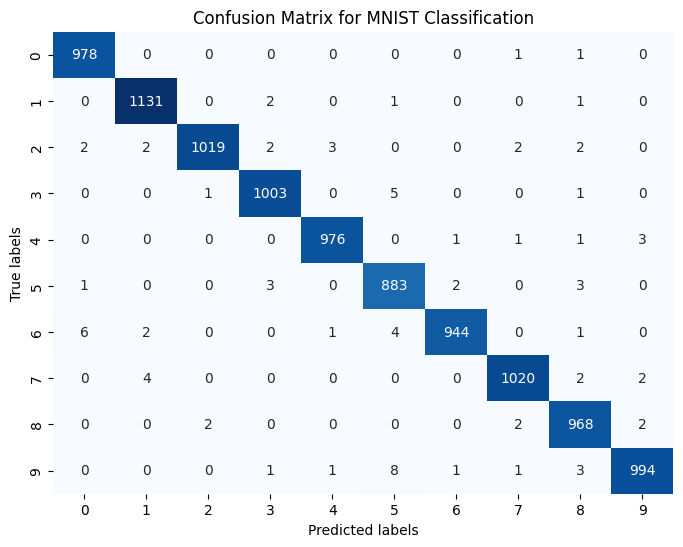

In [24]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Hyperparameter Tuning for Convolutional Neural Networks

* You can use the same strategies learned for tuning regular neural networks
* First, reduce the number of layers

In [25]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.2143 - accuracy: 0.9375 - val_loss: 0.0682 - val_accuracy: 0.9825
Epoch 2/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0826 - val_accuracy: 0.9748
Epoch 3/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0507 - val_accuracy: 0.9867
Epoch 4/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 5/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0533 - val_accuracy: 0.9857
313/313 - 0s - loss: 0.0514 - accuracy: 0.9835 - 431ms/epoch - 1ms/step

Test accuracy: 0.9835000038146973


* Remove the post-processing Dense layer

In [26]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 11ms/step - loss: 0.2005 - accuracy: 0.9415 - val_loss: 0.0636 - val_accuracy: 0.9817
Epoch 2/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.0576 - val_accuracy: 0.9843
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 4/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0387 - val_accuracy: 0.9887
313/313 - 1s - loss: 0.0402 - accuracy: 0.9867 - 734ms/epoch - 2ms/step

Test accuracy: 0.9866999983787537


* Have more filters in the convolutional layers

In [27]:
# Build the model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 21s 24ms/step - loss: 0.1649 - accuracy: 0.9496 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 2/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0420 - val_accuracy: 0.9887
Epoch 3/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 5/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0479 - val_accuracy: 0.9880
313/313 - 2s - loss: 0.0400 - accuracy: 0.9886 - 2s/epoch - 5ms/step

Test accuracy: 0.9886000156402588


* Add an extra pooling layer

In [43]:
# Build the model
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 10ms/step - loss: 0.2843 - accuracy: 0.9122 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 2/5
844/844 [==============================] - 8s 10ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 4/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0392 - val_accuracy: 0.9885
313/313 - 1s - loss: 0.0491 - accuracy: 0.9869 - 611ms/epoch - 2ms/step

Test accuracy: 0.9868999719619751


* Remove some pooling layers

In [55]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 17s 20ms/step - loss: 0.1597 - accuracy: 0.9502 - val_loss: 0.0626 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 3/5
844/844 [==============================] - 19s 22ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0306 - val_accuracy: 0.9918
Epoch 4/5
844/844 [==============================] - 18s 22ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 5/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0311 - val_accuracy: 0.9925
313/313 - 2s - loss: 0.0226 - accuracy: 0.9934 - 2s/epoch - 5ms/step

Test accuracy: 0.993399977684021


## A Few Warnings
* Because of the downsampling/dimensionality reduction performed by the convolutional and pooling layers, you can reduce the information passed onto the next layer to nothing (`ValueError`)
* Tips to fix these errors:
    * Reduce the number of layers, especially the number of pooling layers
    * Reduce the pool size (minimum is (2,2))
    * Use the `padding="same"` for the Conv2D layers
* These networks can take a very long time to train, especially with many filters, many layers, or a large amount of data